<h1>Outras operações:</h1>

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def plotImagem(img, titulo):    
    import matplotlib.pyplot as plt
    obj_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,8))
    plt.title(titulo)
    plt.imshow(obj_img)
    plt.show()

<h3>1 - Cálculo e apresentação do histograma</h3>

In [60]:
def calcHist(img):
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m

    altura, largura = img.shape

    if img.dtype == 'uint8':
        buffer = np.zeros((256))

    for y in range(0, altura):
        for x in range(0, largura):

            buffer[(img[y, x])] += 1

    return 100*buffer/(altura*largura)

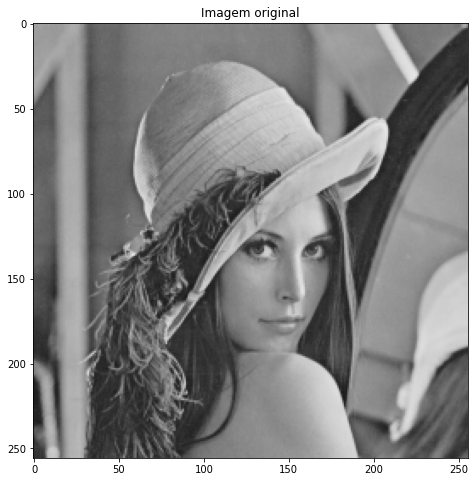

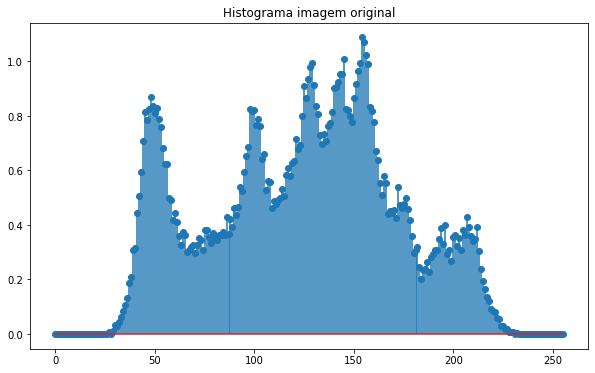

In [61]:
img = cv2.imread('imgs/lena_color_256.tif', cv2.IMREAD_GRAYSCALE)

plotImagem(img, 'Imagem original')

hist1 = calcHist(img)
plt.figure(figsize=(10,6))
plt.stem(hist1)
plt.title('Histograma imagem original')
plt.show()

<h3>2 - Equalização do histograma:</h3>

In [62]:
def eqHistograma(img):
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m

    lin, col = img.shape

    nova_img = np.zeros((lin, col))
    
    Tmin = np.min(img)
    Tmax = np.max(img)

    for j in range(0, lin):
        for k in range(0, col):
            nova_img[j, k] = np.ceil(255*((img[j, k] - Tmin)/(Tmax - Tmin)))
            
    nova_img = np.uint8(nova_img)
    
    return nova_img

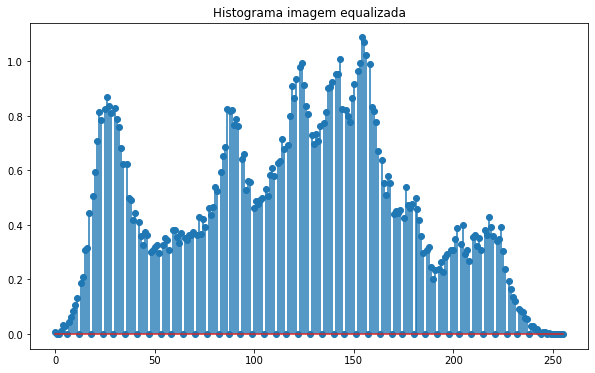

Text(0.5, 1.0, 'Imagem equalizada')

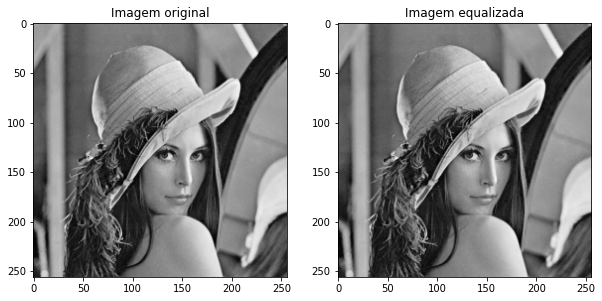

In [63]:
nova_img = eqHistograma(img)
hist2 = calcHist(nova_img)

plt.figure(figsize=(10,6))
plt.stem(hist2)
plt.title('Histograma imagem equalizada')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.subplot(1,2,1).set_title('Imagem original')
plt.subplot(1,2,2)
plt.imshow(nova_img, 'gray')
plt.subplot(1,2,2).set_title('Imagem equalizada')

<h3>3 - Limiarizacao:</h3>

In [64]:
def limiarizacao(img, limiar):

    img_saida = np.zeros(img.shape)

    Tmin = np.min(img)
    Tmax = np.max(img)
    
    altura, largura = img_saida.shape    

    for y in range(0, altura):
        for x in range(0, largura):
            if img[y][x] < limiar:
                img_saida[y, x] = Tmin
            else:
                img_saida[y, x] = Tmax

    img_saida = np.uint8(img_saida)

    return img_saida

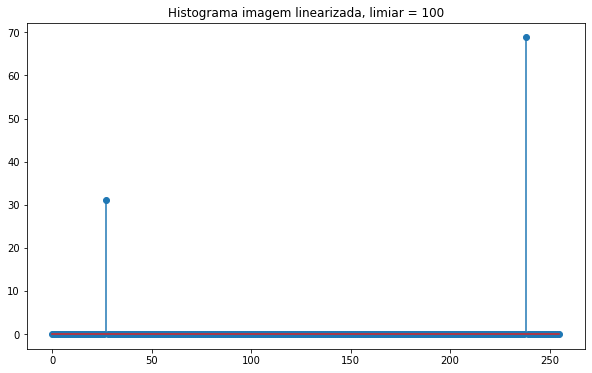

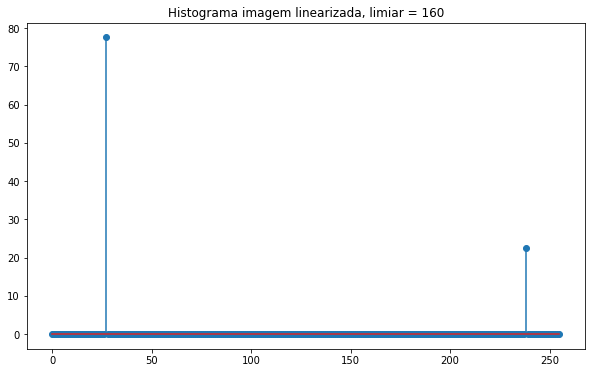

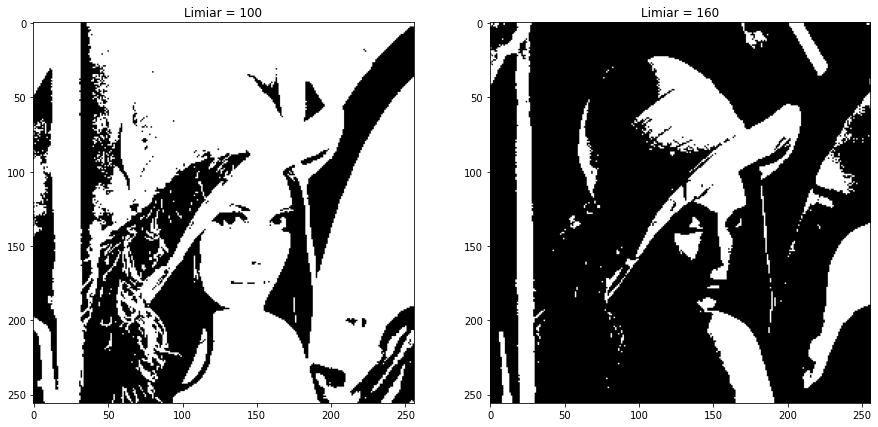

In [65]:
nova_img_1 = limiarizacao(img, 100)
nova_img_2 = limiarizacao(img, 160)

plt.figure(figsize=(10,6))
hist1 = calcHist(nova_img_1)
plt.stem(hist1)
plt.title('Histograma imagem linearizada, limiar = 100')
plt.show()

plt.figure(figsize=(10,6))
hist2 = calcHist(nova_img_2)
plt.stem(hist2)
plt.title('Histograma imagem linearizada, limiar = 160')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('Limiar = 100')
plt.imshow(nova_img_1, 'gray')
plt.subplot(1,2,2)
plt.subplot(1,2,2).set_title('Limiar = 160')
plt.imshow(nova_img_2, 'gray')


<h3>4 - Multilimiarizacao:</h3>

In [66]:
def multiLimiarizacao(img, Linf, Lsup):

    img_saida = np.zeros(img.shape)

    Tmin = np.min(img)
    Tmax = np.max(img)
  
    altura, largura = img_saida.shape    

    for y in range(0, altura):
        for x in range(0, largura):
              
            if img[y][x] > Lsup:
                img_saida[y, x] = Tmax
            elif img[y][x] <= Lsup and img[y][x] > Linf:
                img_saida[y, x] = Linf + int((Lsup - Linf)/2)
            elif img[y][x] <= Linf:
                img_saida[y, x] = Tmin             
            
    img_saida = np.uint8(img_saida)

    return img_saida

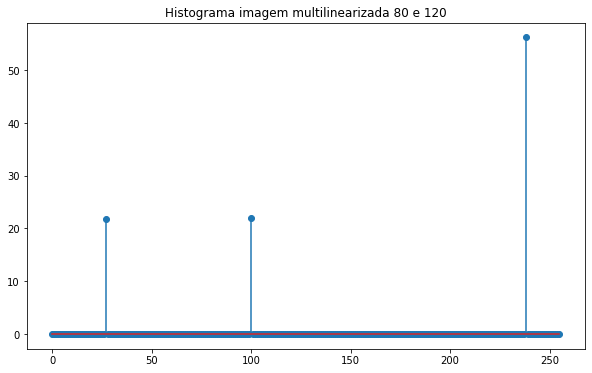

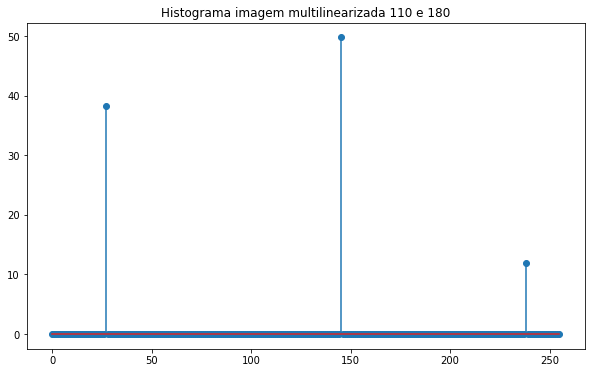

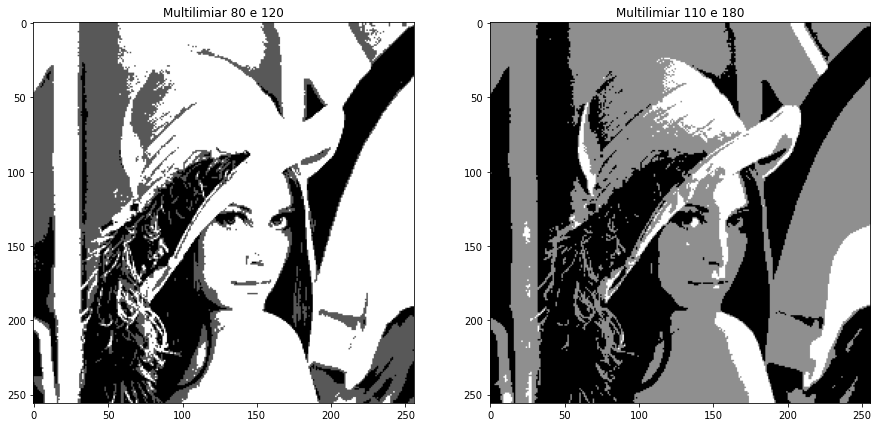

In [57]:
nova_img_1 = multiLimiarizacao(img, 80, 120)
nova_img_2 = multiLimiarizacao(img, 110, 180)

hist1 = calcHist(nova_img_1)
plt.figure(figsize=(10,6))
plt.stem(hist1)
plt.title('Histograma imagem multilinearizada 80 e 120')
plt.show()

hist2 = calcHist(nova_img_2)
plt.figure(figsize=(10,6))
plt.stem(hist2)
plt.title('Histograma imagem multilinearizada 110 e 180')
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('Multilimiar 80 e 120')
plt.imshow(nova_img_1, 'gray')
plt.subplot(1,2,2)
plt.subplot(1,2,2).set_title('Multilimiar 110 e 180')
plt.imshow(nova_img_2, 'gray')